In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from river import drift

In [27]:
# Generate data for 3 distributions
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8, 0.05, 1000)
dist_b = random_state.normal(0.4, 0.02, 1000)
dist_c = random_state.normal(0.6, 0.1, 1000)

# Concatenate data to simulate a data stream with 2 drifts
stream = np.concatenate((dist_a, dist_b, dist_c))

In [28]:
# dist_a

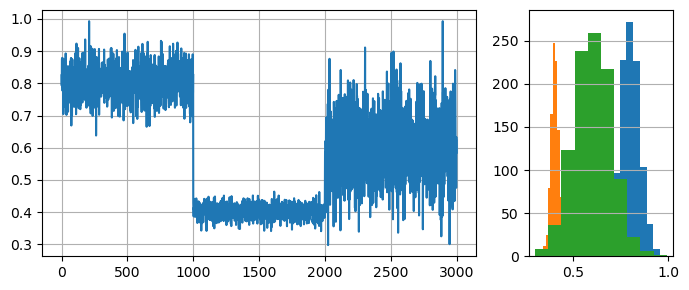

In [29]:
# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(dist_a, label=r'$dist_a$')
    ax2.hist(dist_b, label=r'$dist_b$')
    ax2.hist(dist_c, label=r'$dist_c$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(dist_a, dist_b, dist_c)

Change detected at index 910
Change detected at index 1012
Change detected at index 1791
Change detected at index 2005
Change detected at index 2637
Change detected at index 2778


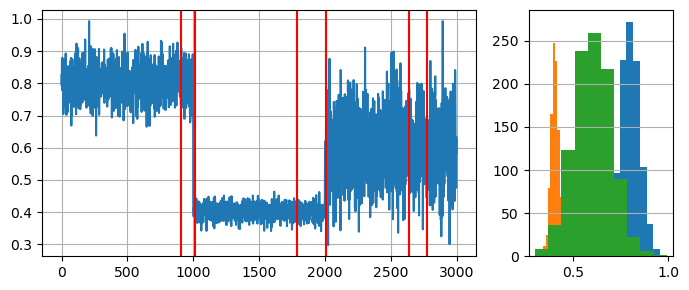

In [30]:
drift_detector = drift.KSWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # As a best practice, we reset the detector

plot_data(dist_a, dist_b, dist_c, drifts)

Change detected at index 1055
Change detected at index 2079


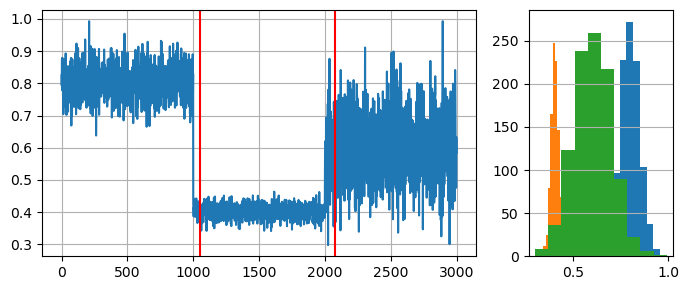

In [31]:
drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # As a best practice, we reset the detector

plot_data(dist_a, dist_b, dist_c, drifts)

Change detected at index 299
Change detected at index 599
Change detected at index 899
Change detected at index 1199
Change detected at index 1499
Change detected at index 1799
Change detected at index 2099
Change detected at index 2399
Change detected at index 2699
Change detected at index 2999


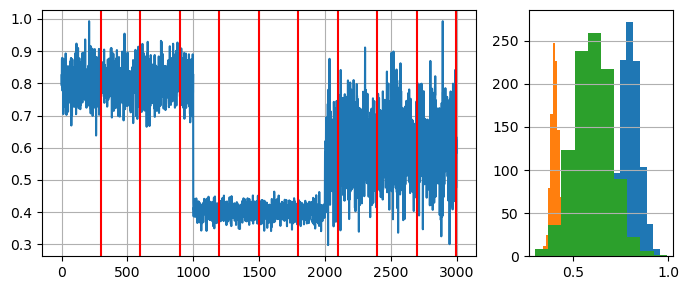

In [32]:
drift_detector = drift.DummyDriftDetector()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # As a best practice, we reset the detector

plot_data(dist_a, dist_b, dist_c, drifts)

Change detected at index 1136
Change detected at index 2309


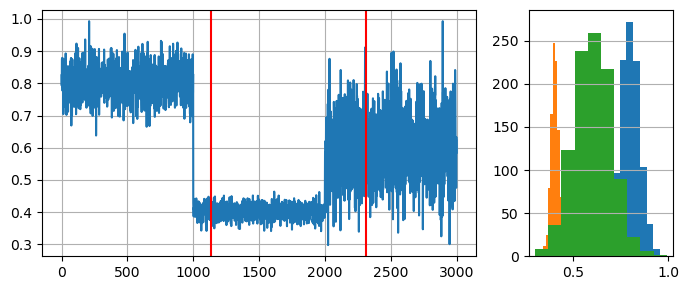

In [33]:
drift_detector = drift.PageHinkley()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
#         drift_detector.reset()   # As a best practice, we reset the detector

plot_data(dist_a, dist_b, dist_c, drifts)